In [154]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import numpy as np

pd.set_option('display.max_columns', None)

# Enable inline plotting
%matplotlib inline


In [155]:
df = pd.read_csv("/home/lakis/flights14.csv", sep=",")

In [163]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,cancelled,carrier,tailnum,flight,origin,dest,air_time,distance,hour,min,is_late
0,2014,1,1,914,14,1238,13,0,AA,N338AA,1,JFK,LAX,359,2475,9,14,1
1,2014,1,1,1157,-3,1523,13,0,AA,N335AA,3,JFK,LAX,363,2475,11,57,1
2,2014,1,1,1902,2,2224,9,0,AA,N327AA,21,JFK,LAX,351,2475,19,2,1
3,2014,1,1,722,-8,1014,-26,0,AA,N3EHAA,29,LGA,PBI,157,1035,7,22,0
4,2014,1,1,1347,2,1706,1,0,AA,N319AA,117,JFK,LAX,350,2475,13,47,1
5,2014,1,1,1824,4,2145,0,0,AA,N3DEAA,119,EWR,LAX,339,2454,18,24,0
6,2014,1,1,2133,-2,37,-18,0,AA,N323AA,185,JFK,LAX,338,2475,21,33,0
7,2014,1,1,1542,-3,1906,-14,0,AA,N328AA,133,JFK,LAX,356,2475,15,42,0
8,2014,1,1,1509,-1,1828,-17,0,AA,N5FJAA,145,JFK,MIA,161,1089,15,9,0
9,2014,1,1,1848,-2,2206,-14,0,AA,N3HYAA,235,JFK,SEA,349,2422,18,48,0


In [132]:
df.arr_delay.describe()

count    253316.000000
mean          8.146702
std          45.749452
min        -112.000000
25%         -15.000000
50%          -4.000000
75%          15.000000
max        1494.000000
Name: arr_delay, dtype: float64

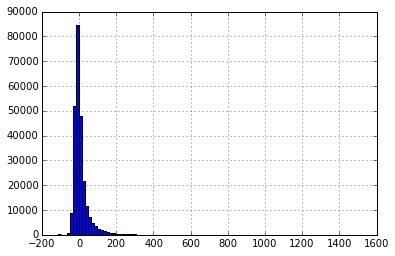

In [160]:
df.arr_delay.hist(bins=100)

In [161]:
df["is_late"] = df.arr_delay.apply(lambda delay: 1.0 if delay>0 else 0.0)

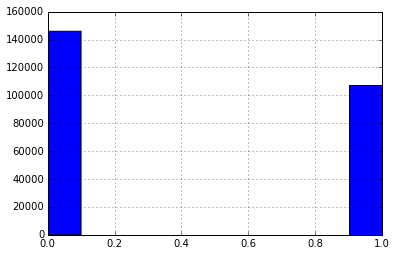

In [162]:
df.is_late.hist()

In [136]:
for col in df.columns:
    if df[col].dtype==object:
        df[col] = df[col].astype('category')

In [164]:
# Create test and train data sets
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

In [165]:
print len(train), len(test)

202634 50682


In [166]:
df.dtypes


year           int64
month          int64
day            int64
dep_time       int64
dep_delay      int64
arr_time       int64
arr_delay      int64
cancelled      int64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time       int64
distance       int64
hour           int64
min            int64
is_late      float64
dtype: object

In [168]:
# Building a model for is_late
from sklearn.ensemble import RandomForestClassifier

features = [ x for x in train.columns if x not in ["is_late", "arr_delay", "carrier", "tailnum", "dest", "origin"] ]

clf = RandomForestClassifier(n_jobs=2)

clf.fit( train[features].values , train["is_late"].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
RES = clf.predict(test[features].values)


In [170]:
from sklearn.metrics import classification_report
print classification_report(test["is_late"].values, RES)

             precision    recall  f1-score   support

        0.0       0.83      0.93      0.88     29272
        1.0       0.89      0.73      0.80     21410

avg / total       0.85      0.85      0.85     50682



In [143]:
df = df.apply(lambda x: pd.factorize(x)[0] if x.name in  ["carrier", "tailnum", "dest", "origin"] else x)

In [144]:
train = df[msk]
test = df[~msk]

In [145]:
# Building a model for is_late
from sklearn.ensemble import RandomForestClassifier

features = [ x for x in train.columns if x not in ["is_late", "arr_delay"] ]

clf = RandomForestClassifier(n_jobs=2)

clf.fit( train[features].values , train["is_late"].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
RES = clf.predict(test[features].values)

In [147]:
from sklearn.metrics import classification_report
print classification_report(test["is_late"].values, RES)

             precision    recall  f1-score   support

        0.0       0.82      0.93      0.87     29281
        1.0       0.89      0.72      0.80     21422

avg / total       0.85      0.84      0.84     50703



In [148]:
sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), features), reverse=True)

[(0.3462, 'dep_delay'),
 (0.1208, 'arr_time'),
 (0.0903, 'air_time'),
 (0.0739, 'dep_time'),
 (0.0581, 'tailnum'),
 (0.0501, 'day'),
 (0.0464, 'flight'),
 (0.046, 'distance'),
 (0.0455, 'min'),
 (0.0382, 'month'),
 (0.0291, 'dest'),
 (0.028, 'hour'),
 (0.0173, 'carrier'),
 (0.0102, 'origin'),
 (0.0, 'year'),
 (0.0, 'cancelled')]

In [152]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["in time", "late"], rotation=45)
    plt.yticks(tick_marks, ["in time", "late"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [150]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[27323  1958]
 [ 5933 15489]]


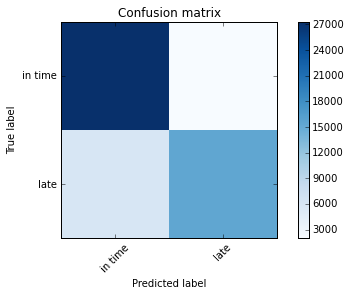

In [153]:
# Compute confusion matrix
cm = confusion_matrix(test["is_late"].values, RES)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)